In [260]:
import pandas as pd
df1 = pd.read_csv('BTC_Trial_NB.csv')
df1.columns

Index(['Date', 'Month', 'Year', 'VOL1', 'VOL7', 'VOL30', 'ClosePrice ',
       'OpenPrice', 'HighPrice', 'LowPrice', 'Market Volumn',
       'Average Block Size', 'Average Transaction Per Block', 'Hash Rate',
       'Network Difficulty', 'Unique Addresses', 'Transactions Per Second',
       'SP500', 'RUSSELL', 'Oil', 'Gold', 'Silver', 'USDEUR', 'USDYUAN',
       'Interest Rate', 'Economic Uncertainty', 'Crypto Index'],
      dtype='object')

In [261]:
df1.index = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [262]:
df = df1.drop(['Date', 'Network Difficulty'],axis=1)

In [263]:
df.shape

(2310, 25)

In [264]:
import pandas as pd

# columns_to_lag_1_7 = ['VOL1', 'ClosePrice ','OpenPrice', 'HighPrice', 'LowPrice', 'Market Volumn']

columns_to_lag_1_7 = ['Market Volumn', 'VOL1', 'ClosePrice ']
columns_to_lag_1_2 = ['Interest Rate', 'Crypto Index', 'SP500', 'RUSSELL', 'Oil', 'Gold', 'Silver', 'USDEUR', 'USDYUAN', 'Interest Rate','Economic Uncertainty',]

# columns_to_lag_1_2 = ['Average Block Size', 'Average Transaction Per Block', 'Hash Rate',
#     'Transactions Per Second', 'SP500', 'RUSSELL',
#     'Oil', 'Gold', 'Silver', 'USDEUR', 'USDYUAN', 'Interest Rate',
#     'Economic Uncertainty', 'Crypto Index']

# Create lagged features for 1-7 lags for 'VOL1' and 'ClosePrice'
for column in columns_to_lag_1_7:
    for lag in range(1, 3):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)

# Create lagged features for 1-2 lags for the rest of the columns
for column in columns_to_lag_1_2:
    for lag in range(0, 3):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)

# Include the original 'VOL1' and 'ClosePrice' columns
new_df = df[['VOL1', 'ClosePrice ','Month', 'Year', 'OpenPrice'] + [f'{col}_lag{lag}' for col in columns_to_lag_1_7 for lag in range(1, 3)] + [f'{col}_lag{lag}' for col in columns_to_lag_1_2 for lag in range(0, 3)]]

# Drop rows with NaN values created due to lagging
new_df = new_df.dropna()

In [265]:
new_df.columns

Index(['VOL1', 'ClosePrice ', 'Month', 'Year', 'OpenPrice',
       'Market Volumn_lag1', 'Market Volumn_lag2', 'VOL1_lag1', 'VOL1_lag2',
       'ClosePrice _lag1', 'ClosePrice _lag2', 'Interest Rate_lag0',
       'Interest Rate_lag1', 'Interest Rate_lag2', 'Crypto Index_lag0',
       'Crypto Index_lag1', 'Crypto Index_lag2', 'SP500_lag0', 'SP500_lag1',
       'SP500_lag2', 'RUSSELL_lag0', 'RUSSELL_lag1', 'RUSSELL_lag2',
       'Oil_lag0', 'Oil_lag1', 'Oil_lag2', 'Gold_lag0', 'Gold_lag1',
       'Gold_lag2', 'Silver_lag0', 'Silver_lag1', 'Silver_lag2', 'USDEUR_lag0',
       'USDEUR_lag1', 'USDEUR_lag2', 'USDYUAN_lag0', 'USDYUAN_lag1',
       'USDYUAN_lag2', 'Interest Rate_lag0', 'Interest Rate_lag1',
       'Interest Rate_lag2', 'Economic Uncertainty_lag0',
       'Economic Uncertainty_lag1', 'Economic Uncertainty_lag2'],
      dtype='object')

In [266]:
x = new_df.drop(columns = ['ClosePrice ','VOL1'])
y = new_df['VOL1']

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [268]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [269]:
X_train_scaled.shape, X_test_scaled.shape

((1846, 42), (462, 42))

In [270]:
from sklearn.ensemble import RandomForestRegressor

In [271]:
rf = RandomForestRegressor(
    n_estimators=300,        # number of trees in the forest
    max_depth= None,            # maximum depth of the tree
    min_samples_split=2,     # minimum number of samples required to split an internal node
    max_features=0.7,     # number of features to consider when looking for the best split
    random_state=24          # random seed for reproducibility
)
# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)

In [272]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Convert the arrays to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da

In [273]:
y_true = y_test
y_predi = y_pred

print("RMSE: ", rmse(y_true, y_predi))
print("MAPE: ", mape(y_true, y_predi))
print("NMSE: ", nmse(y_true, y_predi))
print("DA: ", DA(y_true, y_predi))

RMSE:  0.006023775245458876
MAPE:  93.9705071150954
NMSE:  1.3231230460041756
DA:  43.817787418655094


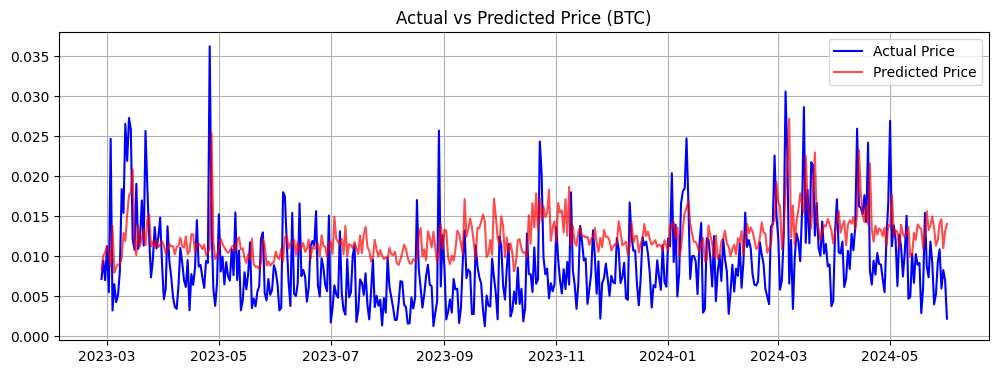

In [274]:
# prediction_df = pd.DataFrame(y_pred, columns=['Predictions'])
# prediction_df.index = y_test.index

p=500

import matplotlib.pyplot as plt
import numpy as np
# Plotting
plt.figure(figsize=(12, 4))
plt.plot(y_test.index[-p:], y_test[-p:], label='Actual Price', color='b')
plt.plot(y_test.index[-p:], y_pred[-p:], label='Predicted Price', color='r', alpha=0.7)
plt.title('Actual vs Predicted Price (BTC)')
plt.legend()
plt.grid(True)
plt.show()

In [279]:
# y_pred = pd.DataFrame(y_test, columns=['Actual'])
y_test.to_csv('VOL Actual.csv')

In [275]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred))

Mean Absolute Error (MAE): 0.0050172582756132745
Mean Squared Error (MSE): 3.628586820780314e-05
Root Mean Squared Error (RMSE): 0.006023775245458876
Mean Absolute Percentage Error (MAPE): 0.939705071150954
Explained Variance Score: 0.07175387900054453
Max Error: 0.025357396666666664
Mean Squared Log Error: 3.545655361329322e-05
Median Absolute Error: 0.004742678333333334
R^2: -0.32312304600417563
Mean Poisson Deviance: 0.003397859459097705
Mean Gamma Deviance: 0.3713385483957308


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


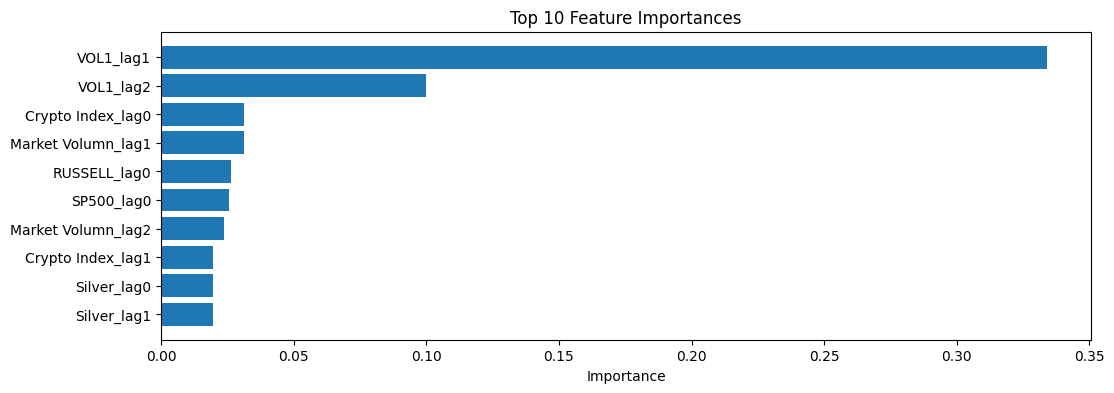

In [276]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_names = x.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_features_df = feature_importances_df.head(10)

# Plot top 5 feature importances
plt.figure(figsize=(12, 4))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()